# Keras Tutorials

### Setting table

In [7]:
# Reopen Jupyter Notebook after change the parameter
USE_GPU = False

### Check whether GPU is available

In [8]:
# Check for GPU availability
import tensorflow as tf
print(len(tf.config.experimental.list_physical_devices('GPU')) > 0)

True


### Choose CPU / CPU to run (change USE_GPU parameter)

In [9]:
if USE_GPU:
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    tf.config.set_visible_devices([], 'GPU')

## Generate data

In [10]:
import numpy as np
import random
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [11]:
train_labels = []
train_samples = []

### Example data:
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [12]:
random.seed(0)

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [13]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [14]:
train_samples

array([37, 91, 15, ..., 91, 17, 99])

In [15]:
train_labels

array([1, 0, 1, ..., 1, 0, 1])

In [16]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [18]:
scaled_train_samples

array([[0.37931034],
       [0.87356322],
       [0.81609195],
       ...,
       [0.2183908 ],
       [0.12643678],
       [0.74712644]])

## Simple tf.keras Sequential Model

In [19]:
# For building models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

# For training models
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

## Build the Model

In [20]:
model = Sequential([
    Dense(name="Layer_2", units=16, input_shape=(1,), activation="relu"), # The first hidden layer (the second layover overall)
    Dense(name="Layer_3", units=32, activation="relu"),
    Dense(name="Layer_4", units=2, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30


189/189 - 1s - loss: 0.6836 - accuracy: 0.5524 - val_loss: 0.6775 - val_accuracy: 0.5190 - 517ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6620 - accuracy: 0.6376 - val_loss: 0.6567 - val_accuracy: 0.6190 - 152ms/epoch - 803us/step
Epoch 3/30
189/189 - 0s - loss: 0.6393 - accuracy: 0.6894 - val_loss: 0.6364 - val_accuracy: 0.6667 - 145ms/epoch - 768us/step
Epoch 4/30
189/189 - 0s - loss: 0.6140 - accuracy: 0.7466 - val_loss: 0.6127 - val_accuracy: 0.7000 - 143ms/epoch - 758us/step
Epoch 5/30
189/189 - 0s - loss: 0.5877 - accuracy: 0.7677 - val_loss: 0.5888 - val_accuracy: 0.7143 - 153ms/epoch - 809us/step
Epoch 6/30
189/189 - 0s - loss: 0.5606 - accuracy: 0.7841 - val_loss: 0.5636 - val_accuracy: 0.7429 - 142ms/epoch - 749us/step
Epoch 7/30
189/189 - 0s - loss: 0.5334 - accuracy: 0.8101 - val_loss: 0.5384 - val_accuracy: 0.7857 - 145ms/epoch - 765us/step
Epoch 8/30
189/189 - 0s - loss: 0.5061 - accuracy: 0.8196 - val_loss: 0.5140 - val_accuracy: 0.7952 - 146ms/epoch - 775us/st

In [24]:
import os.path

SAVE_FILE_NAME = "medical_trial_model"

SAVE_FILE_NAME += ".h5"

model.save(os.path.join(os.getcwd(), SAVE_FILE_NAME))

In [25]:
os.getcwd()

'd:\\DATA SCIENCE\\GIT\\DS\\Keras_Tutorial'

## Preprocess Test Data

In [26]:
test_labels = []
test_samples = []

In [27]:
random.seed(101)

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [28]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [29]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [30]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [31]:
predictions

array([[0.29494253, 0.70505744],
       [0.94069636, 0.05930367],
       [0.7221651 , 0.2778349 ],
       ...,
       [0.02938254, 0.9706175 ],
       [0.96473396, 0.035266  ],
       [0.7459274 , 0.2540726 ]], dtype=float32)

In [32]:
rounded_predictions = np.argmax(predictions, axis=1)

## Confusion matrix

In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [35]:
def plot_confusion_matrix(
    cm, classes, percentiles=False, 
        normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Nomralization can be applied by setting "normalize=True"
    """

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    threshold = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
        )
        plt.tight_layout()
        plt.ylabel("True Labels")
        plt.xlabel("Predicted Labels")

Confusion matrix, without normalization
[[ 938  112]
 [  46 1004]]


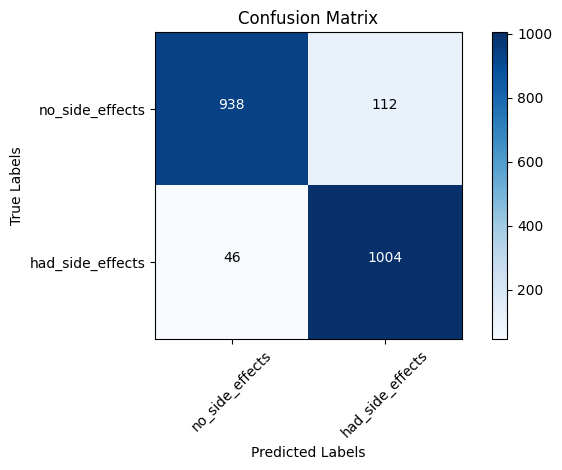

In [36]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Save and Load a model

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [38]:
# Check first to see if file exists already.
# If not, the model is saved to disk.
import os.path

SAVE_FILE_NAME = "medical_trial_model"
SAVE_FILE_NAME += ".h5"

if os.path.isfile(os.path.join(os.getcwd(), SAVE_FILE_NAME)):
    model.save(os.path.join(os.getcwd(), SAVE_FILE_NAME))

This function saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer)
- The state of the optimizer, allowing to resume training exactly where you left off.

In [39]:
os.path.join(os.getcwd(), SAVE_FILE_NAME)

'd:\\DATA SCIENCE\\GIT\\DS\\Keras_Tutorial\\medical_trial_model.h5'

In [40]:
from tensorflow.keras.models import load_model

LOAD_FILE_NAME = SAVE_FILE_NAME
new_model = load_model(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [41]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
new_model.get_weights()

[array([[ 0.71971905, -0.3049085 , -0.2938841 , -0.09668538, -0.26987582,
          0.7708178 ,  0.40663883,  0.34862956, -0.23860714, -0.04333514,
         -0.38872713, -0.38354716, -0.5350459 ,  0.5860485 , -0.4644678 ,
         -0.30706018]], dtype=float32),
 array([-0.15954918,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.16987483,  0.28675178, -0.10402498,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.12596706,  0.        ,
         0.        ], dtype=float32),
 array([[-0.48765123,  0.56730616,  0.17469104, -0.49939483, -0.16748887,
         -0.27864113, -0.21712008, -0.02244359,  0.31745285, -0.28161803,
          0.2939807 ,  0.42931598, -0.17533042, -0.28288576, -0.15967469,
          0.18414119,  0.32569274,  0.3397028 , -0.3224559 ,  0.45913002,
         -0.18960923,  0.15826872, -0.17448047, -0.24220344, -0.36251786,
          0.20529234,  0.33895355, -0.30574352, -0.27582422,  0.41184166,
         -0.17502798, -0.00459329],
 

In [43]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [44]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [45]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "Layer_2_input"}}, {"class_name": "Dense", "config": {"name": "Layer_2", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "Layer_3", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bi

In [46]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [47]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

In [48]:
# Check first to see if file exists already
# If not,  the weights are saved to disk.
import os.path
if os.path.isfile(os.path.join(os.getcwd(), LOAD_FILE_NAME)) is False:
    model.save_weights(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [49]:
model_2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax"),
])

In [50]:
model_2.load_weights(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [51]:
model_2.get_weights()

[array([[ 0.71971905, -0.3049085 , -0.2938841 , -0.09668538, -0.26987582,
          0.7708178 ,  0.40663883,  0.34862956, -0.23860714, -0.04333514,
         -0.38872713, -0.38354716, -0.5350459 ,  0.5860485 , -0.4644678 ,
         -0.30706018]], dtype=float32),
 array([-0.15954918,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.16987483,  0.28675178, -0.10402498,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.12596706,  0.        ,
         0.        ], dtype=float32),
 array([[-0.48765123,  0.56730616,  0.17469104, -0.49939483, -0.16748887,
         -0.27864113, -0.21712008, -0.02244359,  0.31745285, -0.28161803,
          0.2939807 ,  0.42931598, -0.17533042, -0.28288576, -0.15967469,
          0.18414119,  0.32569274,  0.3397028 , -0.3224559 ,  0.45913002,
         -0.18960923,  0.15826872, -0.17448047, -0.24220344, -0.36251786,
          0.20529234,  0.33895355, -0.30574352, -0.27582422,  0.41184166,
         -0.17502798, -0.00459329],
 

## Convolutional Neural Networks

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

#### Data preparation

The images included in the data/cats_and_dogs directory are a random subset of the full cat and dog dataset from the following Kaggle competition: http://www.kaggle.com/c/dogs-vs-cats/data

In [53]:
DATASET_FULL_PATH = "D:\DATA SCIENCE\CLOUD\DATASETS\cats_and_dogs\TRAIN_SANDBOX"

DATASET_TRAIN_CAT_PATH = "train/cat"
DATASET_TRAIN_DOG_PATH = "train/dog"
DATASET_VALID_CAT_PATH = "valid/cat"
DATASET_VALID_DOG_PATH = "valid/dog"
DATASET_TEST_CAT_PATH = "test/cat"
DATASET_TEST_DOG_PATH = "test/dog"

In [54]:
# Organize data into train, valid and test dirs
import os
import random
import glob
import shutil

os.chdir(DATASET_FULL_PATH)

if os.path.isdir(DATASET_TRAIN_CAT_PATH) is False:
    os.makedirs(DATASET_TRAIN_CAT_PATH)
    os.makedirs(DATASET_TRAIN_DOG_PATH)
    os.makedirs(DATASET_VALID_CAT_PATH)
    os.makedirs(DATASET_VALID_DOG_PATH)
    os.makedirs(DATASET_TEST_CAT_PATH)
    os.makedirs(DATASET_TEST_DOG_PATH)

    for c in random.sample(glob.glob("cat*"), 500):
        shutil.move(c, DATASET_TRAIN_CAT_PATH)
    for c in random.sample(glob.glob("dog*"), 500):
        shutil.move(c, DATASET_TRAIN_DOG_PATH)
    for c in random.sample(glob.glob("cat*"), 100):
        shutil.move(c, DATASET_VALID_CAT_PATH)
    for c in random.sample(glob.glob("dog*"), 100):
        shutil.move(c, DATASET_VALID_DOG_PATH)
    for c in random.sample(glob.glob("cat*"), 50):
        shutil.move(c, DATASET_TEST_CAT_PATH)
    for c in random.sample(glob.glob("dog*"), 50):
        shutil.move(c, DATASET_TEST_DOG_PATH)

In [55]:
DATASET_FULL_PATH

'D:\\DATA SCIENCE\\CLOUD\\DATASETS\\cats_and_dogs\\TRAIN_SANDBOX'

In [56]:
os.chdir(DATASET_FULL_PATH)
TRAIN_PATH = "train"
VALID_PATH = "valid"
TEST_PATH = "test"

In [57]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=TRAIN_PATH, target_size=(224, 224), classes=["cat", "dog"], batch_size=10
)

valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=VALID_PATH, target_size=(224, 224), classes=["cat", "dog"], batch_size=10
)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=TEST_PATH,
    target_size=(224, 224),
    classes=["cat", "dog"],
    batch_size=10,
    shuffle=False,
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [58]:
imgs, labels = next(train_batches)

In [59]:
# Each batch contains 10 records
print("Size of imgs: " + str(len(imgs))) 
print("Size of labels: " + str(len(labels)))

Size of imgs: 10
Size of labels: 10


In [60]:
def plotImages(image_arr):
    fig, axes = plt.subplots(1, 10, figsize =(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

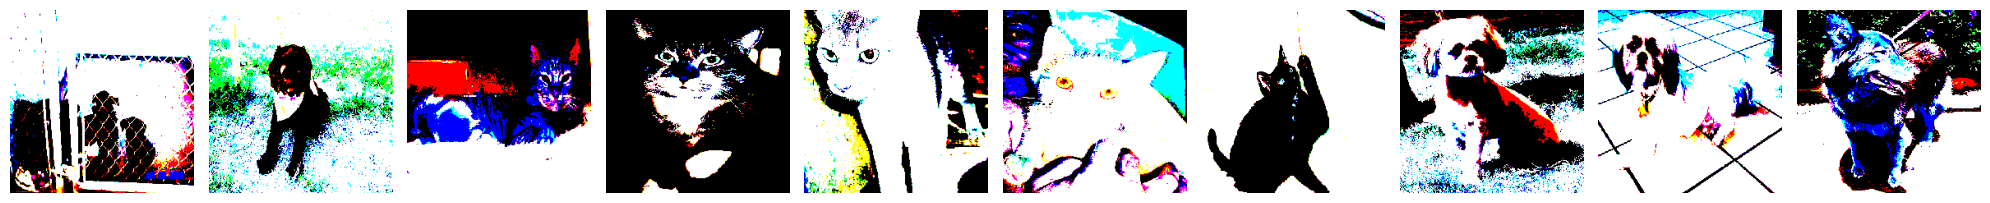

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [61]:
plotImages(imgs)
print(labels)

## Build and train a CNN

In [62]:
model = Sequential(
    [
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(224, 224, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=2, activation="softmax"),
    ]
)

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [64]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [65]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 13s - loss: 25.0015 - accuracy: 0.5350 - val_loss: 8.6330 - val_accuracy: 0.6100 - 13s/epoch - 131ms/step
Epoch 2/10
100/100 - 12s - loss: 4.5964 - accuracy: 0.7330 - val_loss: 8.8680 - val_accuracy: 0.5500 - 12s/epoch - 124ms/step
Epoch 3/10
100/100 - 13s - loss: 1.6338 - accuracy: 0.8330 - val_loss: 4.2320 - val_accuracy: 0.6550 - 13s/epoch - 127ms/step
Epoch 4/10
100/100 - 13s - loss: 0.5964 - accuracy: 0.9180 - val_loss: 4.1409 - val_accuracy: 0.5950 - 13s/epoch - 127ms/step
Epoch 5/10
100/100 - 12s - loss: 0.0851 - accuracy: 0.9820 - val_loss: 3.8011 - val_accuracy: 0.6150 - 12s/epoch - 125ms/step
Epoch 6/10
100/100 - 13s - loss: 0.0174 - accuracy: 0.9950 - val_loss: 3.5624 - val_accuracy: 0.6250 - 13s/epoch - 125ms/step
Epoch 7/10
100/100 - 13s - loss: 7.9692e-04 - accuracy: 1.0000 - val_loss: 3.4626 - val_accuracy: 0.6450 - 13s/epoch - 127ms/step
Epoch 8/10
100/100 - 13s - loss: 3.2028e-04 - accuracy: 1.0000 - val_loss: 3.4982 - val_accuracy: 0.6350 - 13s/ep

### loss: 1.7050e-04
### accuracy: 1.0000
### val_loss: 3.3835
### val_accuracy: 0.6100

### val_accuracy < training_accuracy => Overfitting !

## Predict

In [66]:
test_imgs, test_labels = next(test_batches)

In [67]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
predictions = model.predict(x=test_batches, verbose=0)

In [69]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [70]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[30 20]
 [11 39]]


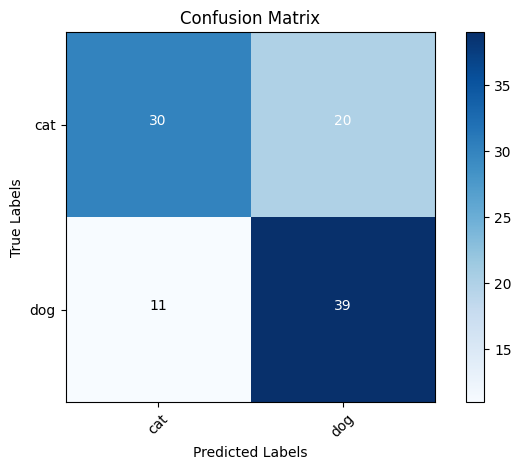

In [71]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Build Fine-tuned VGG16 model

In [72]:
# Download modle - Internet conenction require
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [73]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [74]:
def count_params(model):
    non_trainable_params = np.sum(
        [np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights]
    )
    trainable_params = np.sum(
        [np.prod(v.get_shape().as_list()) for v in model.trainable_weights]
    )
    return {
        "non_trainable_params": non_trainable_params,
        "trainable_params": trainable_params,
    }

In [75]:
params = count_params(vgg16_model)
assert params["non_trainable_params"] == 0, "We have some non-trainable params!"
assert params["trainable_params"] == 138357544, "It is not VGG16 model!"

In [76]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [78]:
params = count_params(model)
assert params["non_trainable_params"] == 0, "We have some non-trainable params!"
assert params["trainable_params"] == 134260544, "This need to add hidden layers (not include output layer)!"

In [79]:
for layer in model.layers:
    layer.trainable = False

In [80]:
model.add(Dense(units=2, activation="softmax"))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [82]:
params = count_params(model)
assert params["non_trainable_params"] == 134260544
assert params["trainable_params"] == 8194

## Train the fine-tuned VGG16 model

In [83]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["Accuracy"])

In [84]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5


100/100 - 58s - loss: 0.3661 - Accuracy: 0.8330 - val_loss: 0.1396 - val_Accuracy: 0.9300 - 58s/epoch - 583ms/step
Epoch 2/5
100/100 - 59s - loss: 0.1012 - Accuracy: 0.9620 - val_loss: 0.1020 - val_Accuracy: 0.9450 - 59s/epoch - 586ms/step
Epoch 3/5
100/100 - 61s - loss: 0.0722 - Accuracy: 0.9740 - val_loss: 0.0860 - val_Accuracy: 0.9500 - 61s/epoch - 610ms/step
Epoch 4/5
100/100 - 60s - loss: 0.0530 - Accuracy: 0.9820 - val_loss: 0.0725 - val_Accuracy: 0.9600 - 60s/epoch - 601ms/step
Epoch 5/5
100/100 - 67s - loss: 0.0413 - Accuracy: 0.9880 - val_loss: 0.0664 - val_Accuracy: 0.9650 - 67s/epoch - 670ms/step


## Predict using fine-tuned VGG16 model

In [85]:
predictions = model.predict(x=test_batches, verbose=0)

In [86]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [88]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[48  2]
 [ 1 49]]


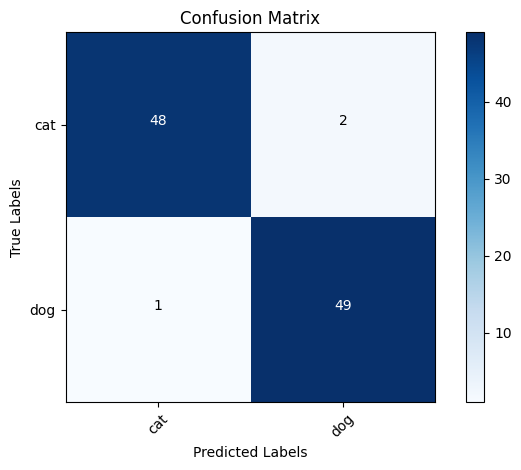

In [89]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [90]:
print("Accuracy: ", str((cm[0][0] + cm[1][1]) / cm.sum()))

Accuracy:  0.97
